### Dataset para el conjunto de entrenamiento y testing

In [84]:
#----- Incluímos las librerías a emplear -----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
#----- Cargamos y visualizamos el dataframe -----
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\MachineLearning\datasets\Advertising.csv")
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


(array([ 1.,  3.,  3., 12., 27., 42., 51., 36., 15., 10.]),
 array([-3.50038499, -2.92576379, -2.35114259, -1.77652139, -1.20190019,
        -0.62727898, -0.05265778,  0.52196342,  1.09658462,  1.67120583,
         2.24582703]),
 <BarContainer object of 10 artists>)

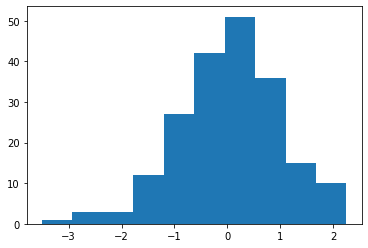

In [86]:
# Distribución uniforme
a = np.random.randn(len(data))
plt.hist(a) # Graficamos un histograma

In [87]:
# División del dataset
check = (a<0.7) # 70% de elementos
training = data[check] # 70%
testing = data[~check] # 30%

# Tamaño de nuestros datasets de entrenamiento y testing
len(training), len(testing)

(152, 48)

In [88]:
# Agregamos el modelo de regresión lineal
import statsmodels.formula.api as smf
# Creamos nuestro modelo de regresión lineal
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [89]:
lm.summary() # Inspeccionamos los resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     603.9
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           3.37e-72
Time:                        03:05:16   Log-Likelihood:                -297.19
No. Observations:                 152   AIC:                             600.4
Df Residuals:                     149   BIC:                             609.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1971      0.339      9.422      0.000       2.527       3.868
TV             0.0449      0.002     27.655      0.000       0.042       0.048
Radio          0.1821      0.009     19.542      0.000       0.164       0.201
==============================================================================
Omnibus:                       56.542   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.648
Skew:                          -1.497   Prob(JB):                     5.85e-35
Kurtosis:                       6.991   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Validamos nuestro modelo con el conjunto de testing
pred = lm.predict(testing)
pred

12     10.656921
18     10.034436
19     14.156818
29      9.277707
33     18.752923
39     20.289839
40     16.341434
44      9.003334
54     20.225471
58     21.685522
60      5.961048
62     16.753707
68     18.853885
69     20.916587
73     10.039384
74     17.249223
77     13.792439
78      8.884579
81     14.700002
83     14.369358
84     20.604660
85     15.214025
86     11.627726
93     21.098481
103    14.757753
114    15.227807
115    12.939777
120    14.415827
123    15.019975
126    10.631283
128    22.002376
131    15.620781
132     8.527429
138     9.842664
139    19.485709
141    18.332440
153    18.110788
154    15.463523
155     5.493528
160    14.230889
164    11.131204
171    14.381976
174    13.792041
175    24.522964
177    12.251918
181    13.981340
191     8.550490
195     5.584364
dtype: float64

In [91]:
# Suma de los cuadrados de la regresión
SSD = sum((testing["Sales"] - pred)**2)
SSD

115.52146376954607

In [92]:
# Error estándar de los residuo
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE # Obtenemos la desviación promedio de los puntos estimados

1.6022308320973124

In [93]:
# Promedio de las ventas
sales_mean = np.mean(testing["Sales"])
sales_mean

14.445833333333335

In [94]:
# Error obtenido en el modelo
error = RSE/sales_mean
error

0.11091300827901787

### Scikit-learn para regresión lineal

In [96]:
#----- Incluímos las librerías a emplear -----
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [97]:
#----- Cargamos y visualizamos el dataframe -----
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\MachineLearning\datasets\Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [98]:
# Extraemos las columnas para nuestra variable predictiva
feature_cols = ["TV", "Radio", "Newspaper"]

In [99]:
# Variables de nuestro modelo
X = data[feature_cols]
Y = data["Sales"]

In [100]:
estimator = SVR(kernel = "linear") # Modelo de ML a emplear
# Implementamos los estimadores para el modelo
selector = RFE(estimator, n_features_to_select = 2, step = 1)
selector = selector.fit(X, Y) # Creamos el modelo

In [101]:
# Nuestro modelo aceptó TV y Radio, pero rechazó Newspaper
selector.support_

array([ True,  True, False])

In [102]:
# Importamos directamente el modelo de Regresión lineal
from sklearn.linear_model import LinearRegression

In [103]:
# Tomamos nuestras variables predictores
X_pred = X[["TV", "Radio"]]

In [104]:
# Creamos el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [105]:
lm.intercept_

2.9210999124051362

In [106]:
lm.coef_

array([0.04575482, 0.18799423])

In [107]:
# Eficiencia del modelo
lm.score(X_pred, Y)

0.8971942610828957

### Relaciones no lineales

In [108]:
#----- Incluímos las librerías a emplear -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#----- Cargamos y visualizamos el dataframe -----
data = pd.read_csv(r"D:\Curso-Jupyter-Notebook\MachineLearning\datasets\auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [110]:
# Tamaño del dataframe
data.shape

(406, 9)

Text(0.5, 1.0, 'CV vs MPG')

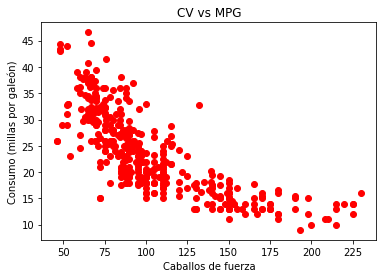

In [111]:
# Graficamos Horsepower vs MPG
%matplotlib inline

data["mpg"] = data["mpg"].dropna()
data["horsepower"] = data["horsepower"].dropna()

plt.plot(data["horsepower"], data["mpg"], "ro")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

# dropna permite eliminar las filas con valores nulos

#### Modelo de regresión lineal

 MPG = a + b*Horsepower

In [112]:
# fillna: reemplaza los NAs con el promedio del array
X = data["horsepower"].fillna(data["horsepower"].mean()).to_numpy()
Y = data["mpg"].fillna(data["mpg"].mean())
# Necesitamos mínimo 2 dimensiones para trabajar con LinearRegression
X_data = X[:, np.newaxis]

In [113]:
# Creamos el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [114]:
# Verificamos el tipo de dato creado
type(X)

numpy.ndarray

In [115]:
# Verificamos el tipo de dato creado
type(X_data)

numpy.ndarray

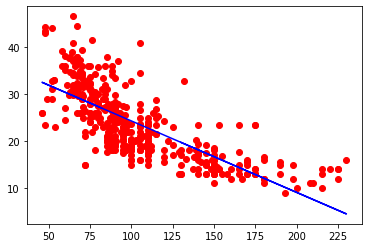

In [116]:
# Graficamos los datos y la recta de regresión lineal
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color = "blue")

In [117]:
# Eficiencia de nuestro modelo
lm.score(X_data, Y)

0.5746533406450252

In [118]:
# Principales características del modelo
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

#### Modelo de regresión cuadrático
MPG = a + b * Horsepower^2

In [119]:
# Elevamos al cuadrado a nuestra variable predictora
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:, np.newaxis]

In [120]:
# Creamos el modelo de "Regresión lineal"
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [121]:
# Eficiencia del modelo
lm.score(X_data, Y)

0.4849887034823205

In [122]:
# Principales características del modelo
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(12490.350340501926,
 5.553410772769817,
 23.514572864321607,
 0.23616889852998113)

#### Modelo de regresión lineal y cuadrático
MPG = a + b * Horsepower + c * Horsepower^2

In [74]:
#----- Incluímos las librerías a emplear -----
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [75]:
# Declaramos un polinomio de grado 2
poly = PolynomialFeatures(degree = 2)

In [76]:
# Transformación lineal a partir de los datos originales (X)
X_data = poly.fit_transform(X[:, np.newaxis])

In [77]:
# Creamos nuestro modelo
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [78]:
# Eficiencia del modelo
lm.score(X_data, Y)

0.6439066584257469

In [79]:
lm.intercept_

55.026192447081144

In [80]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [81]:
# Principales características del modelo
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(8636.180643524502, 4.61778115803654, 23.514572864321607, 0.196379546619069)